In [3]:
import gensim
import numpy as np
import gensim.downloader
model = gensim.downloader.load("glove-wiki-gigaword-50")

In [5]:
np.round(model["tower"], 2)

array([ 1.15,  1.18,  0.75, -0.06,  0.5 , -0.7 , -0.32, -0.45, -0.46,
       -0.75, -0.34, -0.02, -0.5 ,  0.64, -0.83,  0.84, -0.25,  0.32,
       -1.11, -0.02,  0.69, -0.39, -1.64, -0.5 , -0.17, -0.68, -0.32,
        0.89, -0.03, -0.16,  1.98, -1.19,  0.83, -0.18, -0.27,  0.12,
        1.1 , -0.36,  0.03, -0.04,  0.31, -0.41,  0.08,  0.22, -0.51,
        0.66, -0.12, -1.4 ,  0.  , -0.53], dtype=float32)

In [6]:
np.round(model["cat"], 2)

array([ 0.45, -0.5 , -0.54, -0.02,  0.22,  0.55, -0.67, -0.69,  0.63,
       -0.2 ,  0.34,  0.77,  0.9 ,  0.38,  0.38,  0.27, -0.08,  0.61,
       -1.29, -0.22, -0.62,  0.22,  0.36,  0.44,  0.61, -1.16, -1.16,
        0.36,  0.1 , -0.78,  1.44,  0.19, -0.26,  0.83, -0.23,  0.32,
        0.14, -0.45,  0.33, -0.96, -0.1 ,  0.48, -0.43,  0.69,  0.91,
       -0.28,  0.42, -1.26,  0.71,  0.24], dtype=float32)

In [7]:
np.round(model["dog"], 2)

array([ 0.11, -0.39, -0.58, -0.28,  0.71,  0.54, -1.08, -0.4 ,  1.15,
       -0.57,  0.  ,  0.53,  0.65,  0.47,  0.49, -0.18,  0.18,  0.91,
       -1.2 , -0.58, -0.38,  0.34,  0.77,  0.76,  0.46, -1.77, -1.05,
        0.43,  0.42, -0.68,  1.57,  0.28, -0.62,  0.65, -0.08,  0.37,
        0.13, -0.45,  0.25, -0.74, -0.09,  0.24, -0.65,  0.84,  1.25,
       -0.51,  0.04, -0.88,  0.72,  0.39], dtype=float32)

In [15]:
from sklearn.decomposition import PCA

model.vectors.shape
pca = PCA(n_components=3)
pca.fit(model.vectors)

PCA(n_components=3)

In [17]:
cat_50 = model["cat"]
print(np.round(cat_50, 2))
cat_3 = pca.transform(cat_50.reshape(1,50))
print(cat_3)

[ 0.45 -0.5  -0.54 -0.02  0.22  0.55 -0.67 -0.69  0.63 -0.2   0.34  0.77
  0.9   0.38  0.38  0.27 -0.08  0.61 -1.29 -0.22 -0.62  0.22  0.36  0.44
  0.61 -1.16 -1.16  0.36  0.1  -0.78  1.44  0.19 -0.26  0.83 -0.23  0.32
  0.14 -0.45  0.33 -0.96 -0.1   0.48 -0.43  0.69  0.91 -0.28  0.42 -1.26
  0.71  0.24]
[[ 3.1183138   1.4500833  -0.13752316]]


In [18]:
dog_50 = model["dog"]
dog_3 = pca.transform(dog_50.reshape(1, 50))
print(dog_3)

[[3.4680798 1.6603779 0.050007 ]]


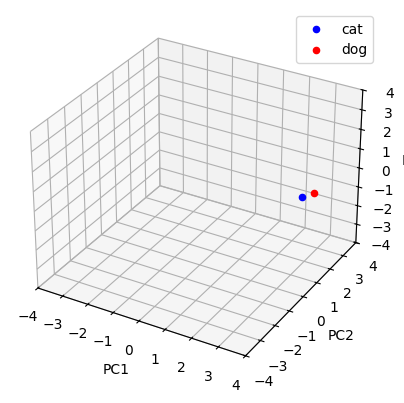

In [20]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cat_3[0, 0], cat_3[0, 1], cat_3[0, 2], color='blue', label='cat')
ax.scatter(dog_3[0, 0], dog_3[0, 1], dog_3[0, 2], color='red', label='dog')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-4, 4)

ax.legend()
plt.show()

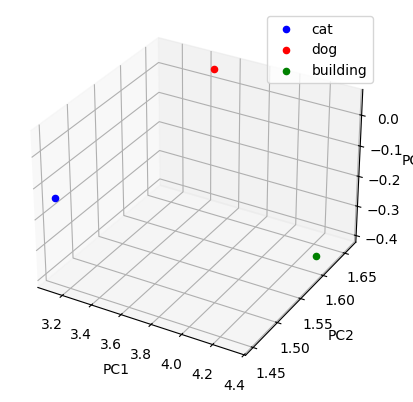

In [23]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
building_50 = model["building"]
building_3 = pca.transform(building_50.reshape(1, 50))

ax.scatter(cat_3[0, 0], cat_3[0, 1], cat_3[0, 2], color='blue', label='cat')
ax.scatter(dog_3[0, 0], dog_3[0, 1], dog_3[0, 2], color='red', label='dog')
ax.scatter(building_3[0, 0],building_3[0, 1], building_3[0, 2], color='green', label='building')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')


ax.legend()
plt.show()

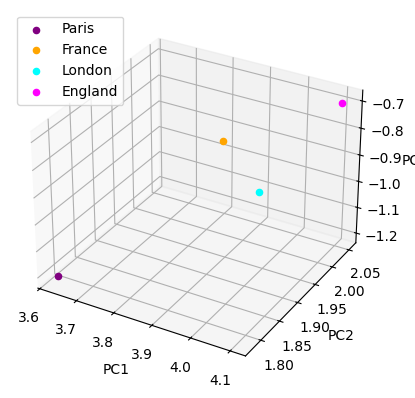

In [24]:
# Get embeddings for the words
paris_50 = model["paris"]
france_50 = model["france"]
london_50 = model["london"]
england_50 = model["england"]

# Project to 3D using PCA
paris_3 = pca.transform(paris_50.reshape(1, 50))
france_3 = pca.transform(france_50.reshape(1, 50))
london_3 = pca.transform(london_50.reshape(1, 50))
england_3 = pca.transform(england_50.reshape(1, 50))

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(paris_3[0, 0], paris_3[0, 1], paris_3[0, 2], color='purple', label='Paris')
ax.scatter(france_3[0, 0], france_3[0, 1], france_3[0, 2], color='orange', label='France')
ax.scatter(london_3[0, 0], london_3[0, 1], london_3[0, 2], color='cyan', label='London')
ax.scatter(england_3[0, 0], england_3[0, 1], england_3[0, 2], color='magenta', label='England')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [25]:
# wir wollen ausrechnen, ob wir von Paris nach Frankreich kommen,
# wenn wir den Vektor von London nach England dazu addieren
vielleicht_frankreich_50 = paris_50 + (england_50 - london_50)
print(np.round(vielleicht_frankreich_50, 2))
print(np.round(france_50, 2))

[ 0.38  0.08 -1.55 -0.84 -0.82 -0.63 -0.67  1.03 -0.59 -0.49  0.22 -0.4
 -1.06 -1.2   0.68 -0.35  0.43 -1.19 -1.07 -0.26 -1.02  0.55 -0.38  0.41
 -0.03 -1.05 -0.15 -0.22 -0.22  0.51  2.4   0.93 -0.53  0.16  0.15 -0.06
  0.11  1.58  0.1  -0.48  0.59 -0.16  1.26 -0.56 -0.59  1.34 -0.29 -0.61
  0.51 -0.82]
[ 0.67  0.3  -1.05 -0.67 -0.78 -0.   -0.18  0.37 -0.19 -0.41  0.99 -0.61
 -0.95 -0.69  0.57 -0.39  0.03 -1.25 -0.74 -0.52 -0.06  0.17 -0.37  0.42
 -0.63 -1.64 -0.25  0.04 -0.4   0.98  2.63  0.83 -0.77  0.39 -0.58 -1.03
 -0.27  0.99 -0.51 -0.42  1.4  -0.03  2.23 -1.71  0.03  0.69 -0.58 -0.18
  0.43 -0.54]


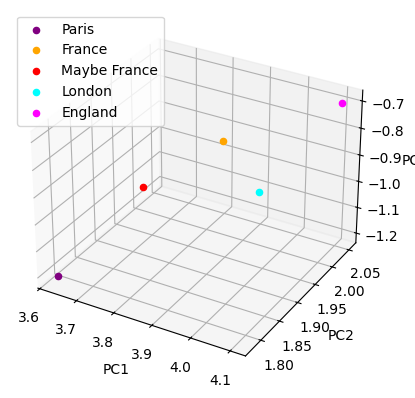

In [26]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

vielleicht_frankreich_3 = pca.transform(vielleicht_frankreich_50.reshape(1, 50))

ax.scatter(paris_3[0, 0], paris_3[0, 1], paris_3[0, 2], color='purple', label='Paris')
ax.scatter(france_3[0, 0], france_3[0, 1], france_3[0, 2], color='orange', label='France')
ax.scatter(vielleicht_frankreich_3[0, 0], vielleicht_frankreich_3[0, 1], vielleicht_frankreich_3[0, 2], color='red', label='Maybe France')
ax.scatter(london_3[0, 0], london_3[0, 1], london_3[0, 2], color='cyan', label='London')
ax.scatter(england_3[0, 0], england_3[0, 1], england_3[0, 2], color='magenta', label='England')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [27]:
import plotly.graph_objs as go

trace_paris = go.Scatter3d(
    x=[paris_3[0, 0]], y=[paris_3[0, 1]], z=[paris_3[0, 2]],
    mode='markers', marker=dict(size=8, color='purple'), name='Paris'
)
trace_france = go.Scatter3d(
    x=[france_3[0, 0]], y=[france_3[0, 1]], z=[france_3[0, 2]],
    mode='markers', marker=dict(size=8, color='orange'), name='France'
)
trace_london = go.Scatter3d(
    x=[london_3[0, 0]], y=[london_3[0, 1]], z=[london_3[0, 2]],
    mode='markers', marker=dict(size=8, color='cyan'), name='London'
)
trace_england = go.Scatter3d(
    x=[england_3[0, 0]], y=[england_3[0, 1]], z=[england_3[0, 2]],
    mode='markers', marker=dict(size=8, color='magenta'), name='England'
)
trace_vielleicht_frankreich = go.Scatter3d(
    x=[vielleicht_frankreich_3[0, 0]], y=[vielleicht_frankreich_3[0, 1]], z=[vielleicht_frankreich_3[0, 2]],
    mode='markers', marker=dict(size=8, color='red'), name='Maybe France'
)

layout = go.Layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend=dict(x=0, y=1)
)

fig_plotly = go.Figure(data=[
    trace_paris,
    trace_france,
    trace_london,
    trace_england,
    trace_vielleicht_frankreich
], layout=layout)

fig_plotly.show()